In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the NMES data set from a tab-separated .txt file
nmes_data = pd.read_csv('/content/nmes.txt', sep='\t', na_values='.')
nmes_data.head()

,PIDX,LASTAGE,MALE,RACE3,eversmk,current,former,AGESMOKE,CIGSSMOK,CIGSADAY,...,yearsince,INCALPER,TOTALEXP,lc5,chd5,beltuse,educate,marital,SREGION,POVSTALB
0,20843014,80,0,3,0.0,NaN,0.0,NaN,NaN,NaN,...,0.0,5805.555102,297.75,0,1,3.0,4,2.0,1,1.0
1,20833013,78,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7428.738855,451.57,0,0,3.0,3,2.0,1,4.0
2,20832010,80,1,3,1.0,1.0,0.0,21.0,10.0,10.0,...,0.0,8220.839822,1368.76,0,1,1.0,3,3.0,1,3.0
3,20829011,71,1,3,1.0,0.0,1.0,16.0,NaN,NaN,...,25.0,4857.094656,1205.32,0,0,3.0,3,1.0,1,5.0
4,20829024,69,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4808.212619,662.02,0,0,NaN,3,1.0,1,5.0


# **Data Pre processing**

In [ ]:
# Filter data for persons 40 and older
nmes_data1 = nmes_data[nmes_data['LASTAGE'] >= 40]

In [ ]:
# show the first 5 rows of the data for persons 40 and older
nmes_data1.head()

,PIDX,LASTAGE,MALE,RACE3,eversmk,current,former,AGESMOKE,CIGSSMOK,CIGSADAY,...,yearsince,INCALPER,TOTALEXP,lc5,chd5,beltuse,educate,marital,SREGION,POVSTALB
0,20843014,80,0,3,0.0,NaN,0.0,NaN,NaN,NaN,...,0.0,5805.555102,297.75,0,1,3.0,4,2.0,1,1.0
1,20833013,78,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7428.738855,451.57,0,0,3.0,3,2.0,1,4.0
2,20832010,80,1,3,1.0,1.0,0.0,21.0,10.0,10.0,...,0.0,8220.839822,1368.76,0,1,1.0,3,3.0,1,3.0
3,20829011,71,1,3,1.0,0.0,1.0,16.0,NaN,NaN,...,25.0,4857.094656,1205.32,0,0,3.0,3,1.0,1,5.0
4,20829024,69,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4808.212619,662.02,0,0,NaN,3,1.0,1,5.0


In [ ]:
#Check the dimensions of the data
nmes_data1.shape

(13648, 24)

There are 13648 rows and 22 columns in the dataframe for persons 40 and older

In [ ]:
#the columns in the data
nmes_data1.columns

Index(['PIDX', 'LASTAGE', 'MALE', 'RACE3', 'eversmk', 'current', 'former',
       'AGESMOKE', 'CIGSSMOK', 'CIGSADAY', 'AGESTOP', 'packyears', 'yearsince',
       'INCALPER', 'TOTALEXP', 'lc5', 'chd5', 'beltuse', 'educate', 'marital',
       'SREGION', 'POVSTALB'],
      dtype='object')

In [ ]:
#checking the datatypes of the dataframe
nmes_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13648 entries, 0 to 13647
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PIDX       13648 non-null  int64  
 1   LASTAGE    13648 non-null  int64  
 2   MALE       13648 non-null  int64  
 3   RACE3      13648 non-null  int64  
 4   eversmk    11684 non-null  float64
 5   current    6437 non-null   float64
 6   former     11496 non-null  float64
 7   AGESMOKE   6241 non-null   float64
 8   CIGSSMOK   5704 non-null   float64
 9   CIGSADAY   2814 non-null   float64
 10  AGESTOP    3140 non-null   float64
 11  packyears  10861 non-null  float64
 12  yearsince  11186 non-null  float64
 13  INCALPER   13648 non-null  float64
 14  TOTALEXP   13648 non-null  float64
 15  lc5        13648 non-null  int64  
 16  chd5       13648 non-null  int64  
 17  beltuse    12405 non-null  float64
 18  educate    13648 non-null  int64  
 19  marital    13328 non-null  float64
 20  SREGIO

The datatypes are correct for all the columns

In [ ]:
#summary statistics
nmes_data1.describe()


,PIDX,LASTAGE,MALE,RACE3,eversmk,current,former,AGESMOKE,CIGSSMOK,CIGSADAY,...,yearsince,INCALPER,TOTALEXP,lc5,chd5,beltuse,educate,marital,SREGION,POVSTALB
count,1.364800e+04,13648.000000,13648.000000,13648.000000,11684.000000,6437.000000,11496.000000,6241.000000,5704.000000,2814.000000,...,11186.000000,13648.000000,13648.000000,13648.000000,13648.000000,12405.000000,13648.000000,13328.000000,13648.000000,13592.000000
mean,2.888199e+07,60.653502,0.431419,2.694387,0.567015,0.464036,0.300104,19.134914,19.652349,20.265814,...,4.737797,6520.868624,2956.329748,0.020516,0.097230,2.338412,2.829499,1.643382,2.534804,3.777148
std,5.110010e+06,13.198304,0.495292,0.589737,0.495510,0.498744,0.458323,6.244002,12.556403,12.313582,...,10.374102,3274.185570,8393.412429,0.141762,0.296282,0.829234,0.938898,1.079353,1.007682,1.308664
min,2.000202e+07,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,780.924047,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.444152e+07,49.000000,0.000000,3.000000,0.000000,0.000000,0.000000,16.000000,10.000000,10.000000,...,0.000000,4061.730219,161.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,3.000000
50%,2.882252e+07,61.000000,0.000000,3.000000,1.000000,0.000000,0.000000,18.000000,20.000000,20.000000,...,0.000000,5451.788234,600.000000,0.000000,0.000000,3.000000,3.000000,1.000000,3.000000,4.000000
75%,3.331527e+07,71.000000,1.000000,3.000000,1.000000,1.000000,1.000000,20.000000,20.250000,25.000000,...,2.000000,9152.403095,1878.795000,0.000000,0.000000,3.000000,3.000000,2.000000,3.000000,5.000000
max,3.761402e+07,94.000000,1.000000,3.000000,1.000000,1.000000,1.000000,70.000000,100.000000,100.000000,...,83.000000,26912.163450,175095.970000,1.000000,1.000000,3.000000,4.000000,5.000000,4.000000,5.000000


In [ ]:
#Check the distribution of the target variable ('TOTALEXP' > $20,000 or not).
print(nmes_data1['TOTALEXP'].value_counts())


0.00       1540
30.00        33
60.00        32
35.00        29
25.00        26
           ... 
577.90        1
2741.38       1
473.03        1
1123.25       1
387.90        1
Name: TOTALEXP, Length: 10196, dtype: int64


In [ ]:
#check the null values
nmes_data1.isnull().sum()

PIDX             0
LASTAGE          0
MALE             0
RACE3            0
eversmk       1964
current       7211
former        2152
AGESMOKE      7407
CIGSSMOK      7944
CIGSADAY     10834
AGESTOP      10508
packyears     2787
yearsince     2462
INCALPER         0
TOTALEXP         0
lc5              0
chd5             0
beltuse       1243
educate          0
marital        320
SREGION          0
POVSTALB        56
dtype: int64

In [ ]:
#check the percentage of null values in each variable
missing_percentage = nmes_data1.isnull().mean() * 100
print(missing_percentage)


PIDX          0.000000
LASTAGE       0.000000
MALE          0.000000
RACE3         0.000000
eversmk      14.390387
current      52.835580
former       15.767878
AGESMOKE     54.271688
CIGSSMOK     58.206331
CIGSADAY     79.381594
AGESTOP      76.992966
packyears    20.420574
yearsince    18.039273
INCALPER      0.000000
TOTALEXP      0.000000
lc5           0.000000
chd5          0.000000
beltuse       9.107562
educate       0.000000
marital       2.344666
SREGION       0.000000
POVSTALB      0.410317
dtype: float64


There are many null values in this data in columns 'eversmk', 'current', 'former',
       'AGESMOKE', 'CIGSSMOK', 'CIGSADAY', 'AGESTOP', 'packyears', 'yearsince', 'beltuse', 'marital',
       and 'POVSTALB'
The percentage of missing values in most of columns are above 50% and is too large to drop them and therefore they are imputed using mean.

In [ ]:
# Imputing with mean for numerical variables
nmes_data1.fillna(nmes_data1.mean(), inplace=True)



In [ ]:
nmes_data1.isnull().sum()

PIDX                   0
LASTAGE                0
Gender                 0
RACE3                  0
eversmk                0
current                0
former                 0
AGESMOKE               0
CIGSSMOK               0
CIGSADAY               0
AGESTOP                0
packyears              0
yearsince              0
INCALPER               0
TOTALEXP               0
lc5                    0
chd5                   0
beltuse                0
educate                0
marital                0
SREGION                0
POVSTALB               0
CIGSSMOK_winsorized    0
TOTALEXP_winsorized    0
dtype: int64

In [ ]:
# Convert appropriate columns to numeric
numeric_columns = ['eversmk', 'current', 'former', 'AGESMOKE', 'CIGSSMOK', 'CIGSADAY', 'AGESTOP', 'packyears', 'yearsince', 'beltuse', 'marital', 'POVSTALB']
nmes_data1[numeric_columns] = nmes_data1[numeric_columns].apply(pd.to_numeric, errors='coerce')


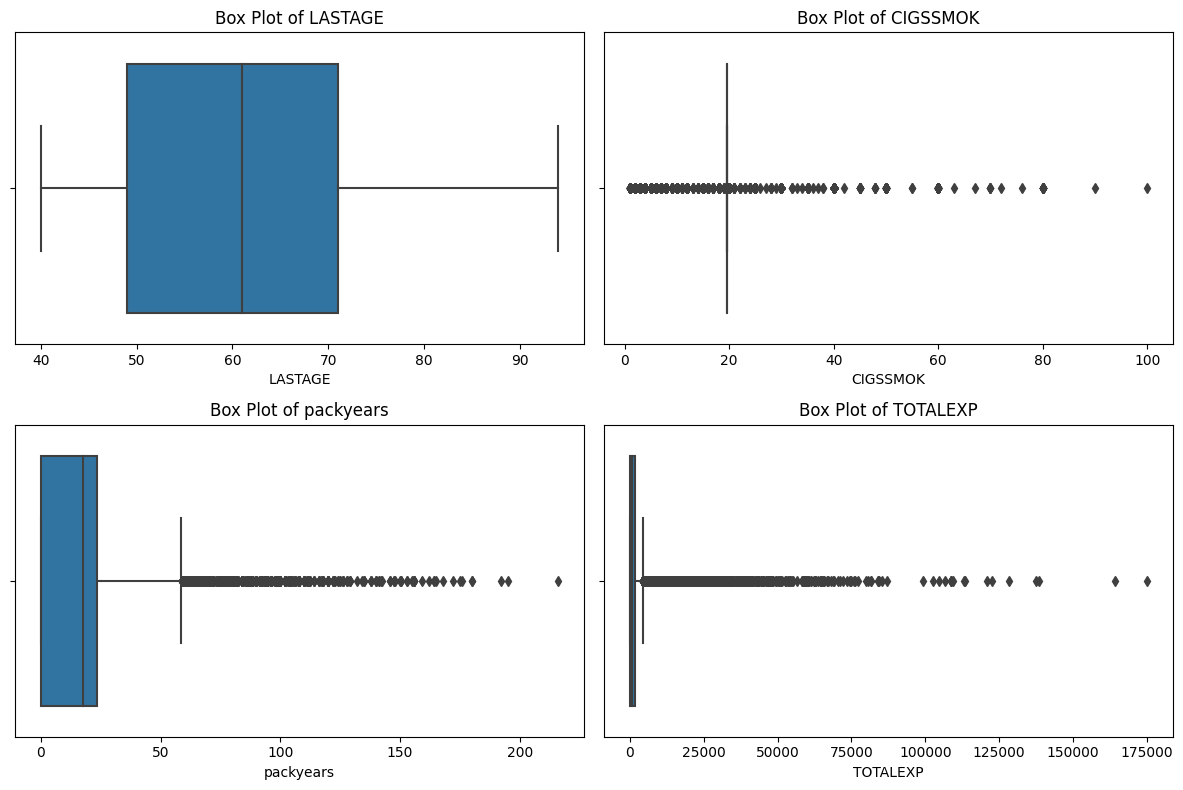

            LASTAGE      CIGSSMOK     packyears       TOTALEXP
count  13648.000000  13648.000000  13648.000000   13648.000000
mean      60.653502     19.652349     17.941000    2956.329748
std       13.198304      8.117052     23.035897    8393.412429
min       40.000000      1.000000      0.000000       0.000000
25%       49.000000     19.652349      0.000000     161.000000
50%       61.000000     19.652349     17.500000     600.000000
75%       71.000000     19.652349     23.500000    1878.795000
max       94.000000    100.000000    216.000000  175095.970000
Number of outliers in LASTAGE: 0
Number of outliers in CIGSSMOK: 5704
Number of outliers in packyears: 831
Number of outliers in TOTALEXP: 1908


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [ ]:
#check for outliers
import seaborn as sns

# Select numerical variables to check for outliers
numerical_variables = ['LASTAGE', 'CIGSSMOK', 'packyears', 'TOTALEXP']

# Create box plots for each numerical variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=nmes_data1, x=variable)
    plt.title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

# Calculate and print summary statistics to identify potential outliers
summary_statistics = nmes_data1[numerical_variables].describe()
print(summary_statistics)

# Define a function to detect outliers based on IQR method
def detect_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

# Detect outliers for each numerical variable
outliers_dict = {variable: detect_outliers(nmes_data1, variable) for variable in numerical_variables}

# Print the count of outliers for each variable
for variable, outliers in outliers_dict.items():
    print(f"Number of outliers in {variable}: {len(outliers)}")


Column LASTAGE has no outlier,CIGSSMOK has 5704,packyears has 831 and TOTALEXP has 1908

In [ ]:
#Replace extreme values with values within a certain percentile range (e.g., 1st and 99th percentiles)
from scipy.stats.mstats import winsorize

nmes_data1['CIGSSMOK_winsorized'] = winsorize(nmes_data1['CIGSSMOK'], limits=[0.01, 0.01])
nmes_data1['TOTALEXP_winsorized'] = winsorize(nmes_data1['TOTALEXP'], limits=[0.01, 0.01])


In [ ]:
#Rename MALE Column to Gender
# Rename the 'MALE' column to 'GENDER'
nmes_data1.rename(columns={'MALE': 'Gender'}, inplace=True)



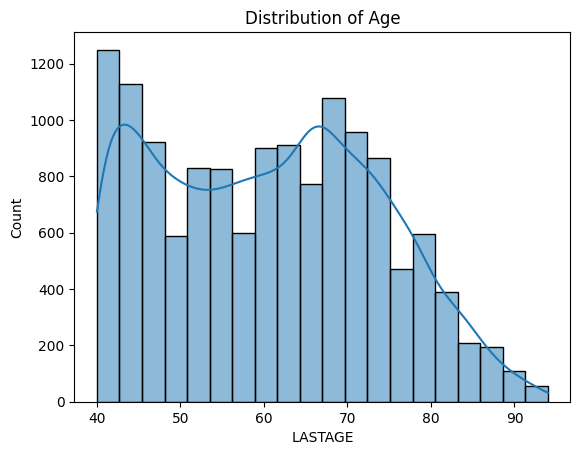

In [ ]:
#Visualize the distribution of numerical variables
sns.histplot(data=nmes_data1, x='LASTAGE', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()


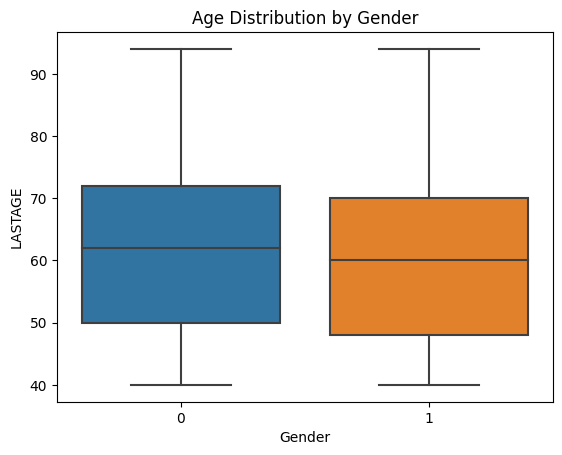

In [ ]:
#Checking the distribution of numerical variables across different categories, like gender or smoking status
sns.boxplot(data=nmes_data1, x='Gender', y='LASTAGE')
plt.title('Age Distribution by Gender')
plt.show()


Mapping for gender is 	1 – male, 0 – female

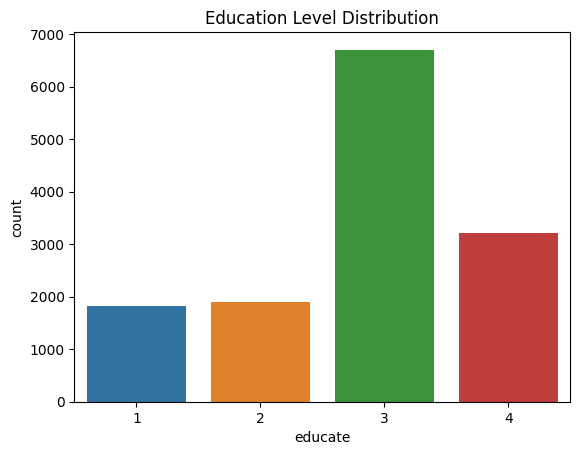

In [ ]:
#Visualizing the count of categorical variables, such as education level or marital status.
sns.countplot(data=nmes_data1, x='educate')
plt.title('Education Level Distribution')
plt.show()


Mapping for Education column is 1 – college grad, 2 – some college, 3 – hs grad, 4 – other

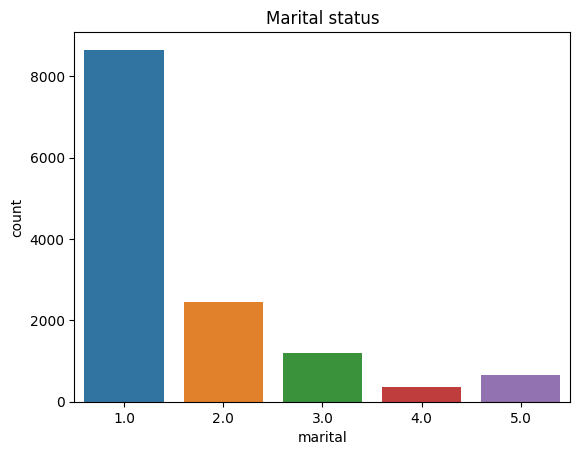

In [ ]:
sns.countplot(data=nmes_data, x='marital')
plt.title('Marital status')
plt.show()


The mapping for marital is as follows	1 – married, 2 – widowed, 3 – divorced, 4 – separated, 5 – never married

                         PIDX   LASTAGE    Gender     RACE3       eversmk  \
PIDX                 1.000000 -0.009143  0.008770 -0.014249 -1.277051e-02   
LASTAGE             -0.009143  1.000000 -0.060159  0.142049 -9.219775e-02   
Gender               0.008770 -0.060159  1.000000  0.014161  2.563379e-01   
RACE3               -0.014249  0.142049  0.014161  1.000000  4.773891e-02   
eversmk             -0.012771 -0.092198  0.256338  0.047739  1.000000e+00   
current              0.000232 -0.156709 -0.064392 -0.071950  2.046788e-17   
former              -0.007361  0.073488  0.200894  0.087860  5.768745e-01   
AGESMOKE            -0.005301  0.112132 -0.182470 -0.028302  2.101314e-17   
CIGSSMOK            -0.003123 -0.023815  0.127926  0.106077  9.074714e-17   
CIGSADAY             0.001061 -0.051247  0.081036  0.118659  8.766893e-17   
AGESTOP              0.001206  0.235570 -0.019302  0.017156 -8.596326e-17   
packyears           -0.009551  0.039944  0.242971  0.110068  6.297354e-01   

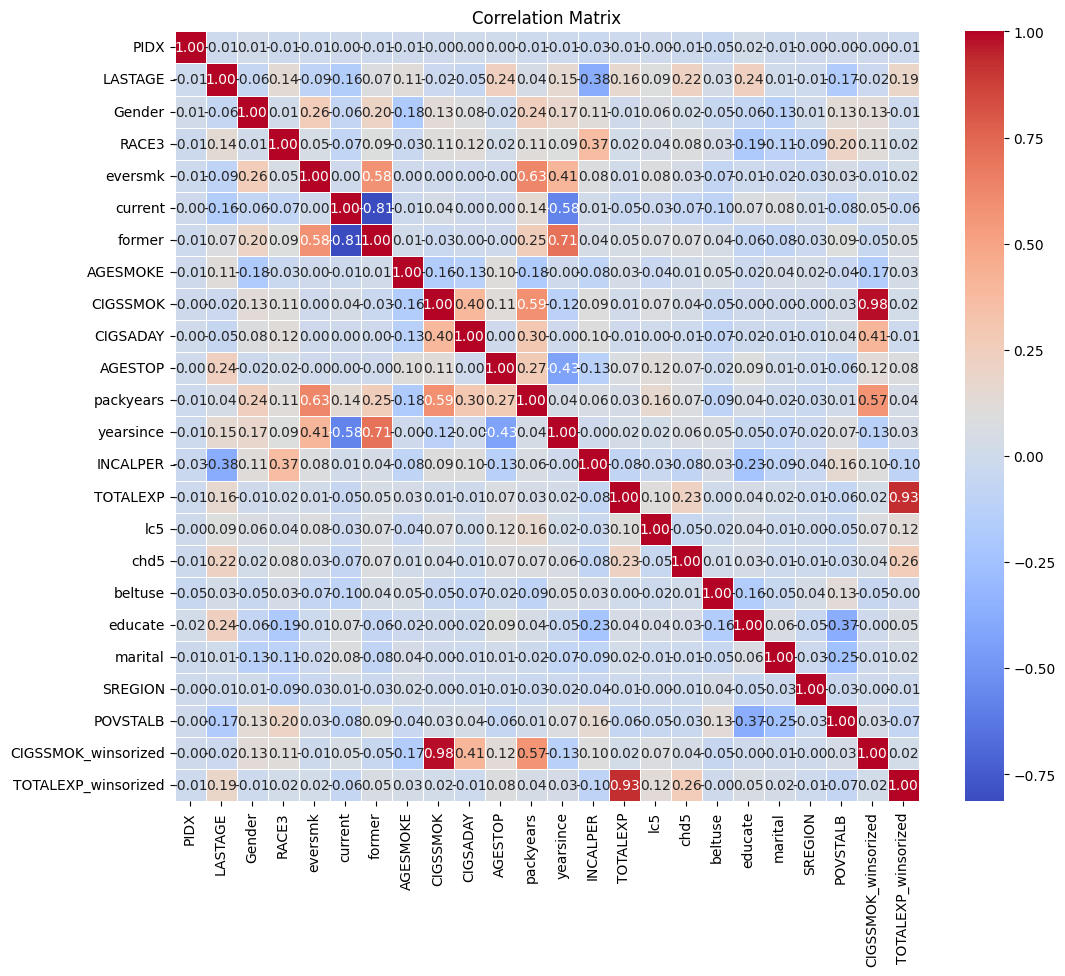

In [ ]:
# Calculate correlation coefficients
correlation_matrix = nmes_data1.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



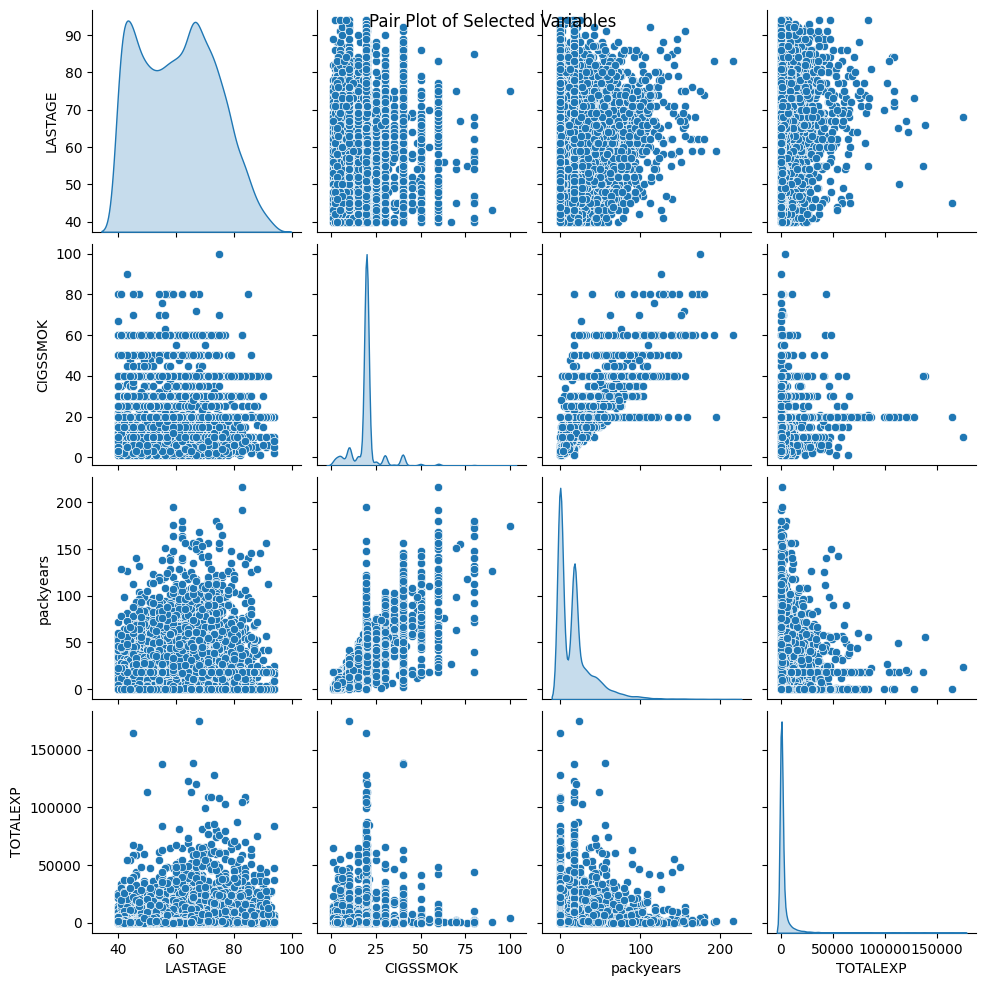

In [ ]:
#Examining pairwise relationships between variables
sns.pairplot(nmes_data1[['LASTAGE', 'CIGSSMOK', 'packyears', 'TOTALEXP']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables')
plt.show()


**Dataset Overview (Post-Preprocessing)**

Entries: 13,648

Age Range: 40 to 94 years

Gender Distribution: 43.14%

Race Distribution: Mainly three categories (with '3' being the most prevalent)

Smoking Status: Includes data on whether an individual has ever smoked, is a current smoker, or a former smoker.

Medical Expenditure (TOTALEXP): Ranges widely, important for the regression model.

Indicators: Lung cancer (lc5) and heart disease (chd5).

**Descriptive Statistics**

Age (LASTAGE): Mean age is approximately 60.65 years.

Medical Expenditures (TOTALEXP): Shows a wide range, with a mean of around $2,956.33 and high variability.
Correlation Analysis

Heart Disease (chd5) shows a notable positive correlation with total medical expenditure (TOTALEXP), suggesting it's an important factor in predicting high medical expenses.

Age and smoking-related variables (e.g., eversmk, current, former) also show some level of correlation with total expenditure.


# **Build the Regression Model**

**Next Steps for Model Building**
1.	Model Selection: Given the task to estimate the risk of large expenditures, a logistic regression model might be suitable. The target variable needs to be created to indicate whether an individual's expenditure is greater than $20,000.
2.	Feature Selection: Based on the exploratory analysis, features like age, gender, indicators of lung cancer and heart disease, and other socio-economic variables should be considered.
3.	Cross-Validation and Model Evaluation: Implement cross-validation to assess the model's performance and stability. Compare different models to select the best performing one.
4.	Model Interpretation: Analyze the coefficients and performance metrics such as sensitivity, specificity, and area under the ROC curve. Compare the final model with a simpler model as specified in the assessment.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Creating a binary target variable for expenditures greater than $20,000
nmes_data1['HighExpenditure'] = np.where(nmes_data1['TOTALEXP'] > 20000, 1, 0)

# Selecting features for the model
features = ['LASTAGE', 'Gender', 'RACE3', 'eversmk', 'current', 'former', 'lc5', 'chd5', 'educate', 'SREGION', 'POVSTALB']
X = nmes_data1[features]
y = nmes_data1['HighExpenditure']


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Building a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Using StratifiedKFold for cross-validation
strat_k_fold = StratifiedKFold(n_splits=5)

# Cross-validation scores
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc')

# Training the model
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

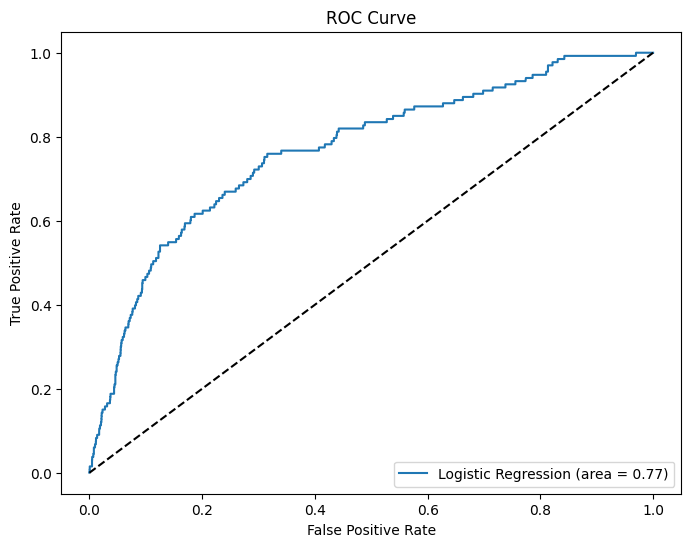

In [ ]:
# Predictions
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:,1]

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Model Performance Summary
performance_summary = {
    'Cross-Validation Scores (ROC AUC)': cv_scores,
    'Mean CV Score': np.mean(cv_scores),
    'ROC AUC Score': roc_auc
}

performance_summary, classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Cross-Validation Scores (ROC AUC)': array([0.78488372, 0.78475724, 0.80424467, 0.6849122 , 0.77778505]),
  'Mean CV Score': 0.7673165743112008,
  'ROC AUC Score': 0.7685692651618952},
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      3962\n           1       0.00      0.00      0.00       133\n\n    accuracy                           0.97      4095\n   macro avg       0.48      0.50      0.49      4095\nweighted avg       0.94      0.97      0.95      4095\n')

The mean ROC AUC is approximately 0.7673, suggesting a moderate level of discrimination.

ROC AUC score of 0.7686 suggests that the model is better than random chance but may have room for improvement.

Precision: The ability of the classifier not to label as positive a sample that is negative. In this case, precision for class 0 is high (0.97), indicating that when the model predicts a large expenditure (class 0), it is correct 97% of the time.

Recall: The ability of the classifier to find all the positive samples. Recall for class 0 is high (1.00), indicating that the model is capturing almost all instances of actual large expenditures.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is high (0.98).

Support: The number of actual occurrences of the class in the specified dataset.

Accuracy: The overall accuracy of the model, which is high (0.97).

**Interpretation:**
The model performs very well in predicting class 0 (no large expenditure) with high precision, recall, and accuracy.

However, it struggles with predicting class 1 (large expenditure) with low precision, recall, and F1-score. This might be due to class imbalance or other issues.




# **Conclusion**

While the model exhibits strong predictive capabilities for instances of no large expenditures, additional refinement is needed to improve its performance on predicting large expenditures.